<a href="https://colab.research.google.com/github/skolix15/Machine_Learning_2025/blob/main/Exercise_three_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Download data tickers for USD

In [3]:
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
# Drop columns Volume, Dividends, Stock Splits
df = df.drop(columns=["Volume", "Dividends", "Stock Splits"])
df

,Date,Open,High,Low,Close
0,2020-11-03 00:00:00-05:00,94.050003,94.050003,93.290001,93.550003
1,2020-11-04 00:00:00-05:00,93.089996,94.300003,93.089996,93.410004
2,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
3,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
4,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
...,...,...,...,...,...
1253,2025-10-28 00:00:00-04:00,98.750000,98.949997,98.570000,98.690002
1254,2025-10-29 00:00:00-04:00,98.739998,99.360001,98.620003,99.220001
1255,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1256,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003


# Question 1

In [4]:
# Create graph
figure = go.Figure(
    layout=go.Layout(
        title="USD Index (DXY) - Τιμές τελευταίων 5 ετών",
        xaxis=dict(title="Date"),
        yaxis=dict(title="Value"),
        width=1000,
        height=600,
        hovermode="x unified",
        template="plotly_white"
    )
)

# Add all the desired columns in the same line plot
for desired_column in ["Open", "High", "Low", "Close"]:
  figure.add_trace(go.Scatter(x=df["Date"], y=df[desired_column], mode="lines", name=desired_column))

# Update layout
figure.show()

# Question 2

Οι χρονοσειρές είναι μη στατικές.
Παρατηρείται αναδική πορεία από το 2021 μέχρι και τα μισά του 2022 και έπειτα καθοδική τάση μέχρι και το 2025.
Αυτό σημαίνει ότι η μέση τιμή (mean) της χρονοσειράς μεταβάλλεται με τον χρόνο.
Επιπλέον, φαίνεται να υπάρχουν πολλές αυξομειώσεις και επομένως εξαιτίας της μη σταθερότητας, η διακύμναση δεν είναι σταθέρη.

# Question 3

Εκπαιδεύοντας έναν Regressor σε μη στατικές χρονοσειρές, τα αποτελέσματα δεν θα είναι πολύ αξιόπιστα καθώς τα στατιστικά χαρακτηριστικά (μέση τιμή, διακύμανση) αλλάζυν με τον χρόνο.

Στα δεδομένα τα συγκεκριμένα υπάρχουν έντονες τάσεις και διακυμάνσεις (ανεβοκατεβάσματα) κάτι το οποίο θα δυσκολέψει το μοντέλο να μάθει τα σταθερά πρότυπα. Έτσι, οι προβλέψεις που θα κάνει θα έχουν μεγάλη απόκληση και αδυναμία έγκυρης γενίκευσης.


# Question 4

Παρατηρείται πτώση του δολαρίου μέσα στον Ιούνιο του 2025 με μια αυξητική τάση ύστερα μέσα στον Ιούλιο μέχρι 17 Ιουλίου όπου και ξεκινάει ξανά μια πτωτική τάση.

Πιθανές αιτίες της πτώσης αυτής αποτελούν οι:

1. Η αγορά την περίοδο του Ιουνίου ανησυχούσε για το αυξανόμενο δημόσιο χρέος των ΗΠΑ, καθώς και για την αβεβαιότητα στις εμπορικές συμφωνίες με μεγάλες οικονομίες. Αυτές οι καταστάσεις μείωσαν την ελκυστικότητα του δολαρίου ως ασφαλές περιουσιακό στοιχείο, κάτι το οποίο οδήγησε στην πτώση του. Ύστερα, η μερική ανάκαμψη του Ιουλίου μπορεί να αποδοθεί σε κινήσεις της αγοράς και επανατοποθετήσεις επενδυτών.

**Source:** https://www.reuters.com/world/middle-east/dollar-droops-optimism-over-us-trade-deals-boost-fed-easing-bets-2025-06-30/?utm_source=chatgpt.com

2. Τον Ιούνιο, η αγορά άρχισε να πιστεύει ότι η Fed (Κεντρική Τράπεζα των ΗΠΑ) θα μειώσει τα επιτόκια μέσα στη χρονιά. Αυτό υπονόμευσε το φυσικό επιτόκιακό πλεονέκτημα του δολαρίου, οδηγώντας σε πτώση της αξίας του.

**Source:** https://www.reuters.com/business/finance/no-love-dollar-markets-fret-about-fed-independence-2025-06-26/?utm_source=chatgpt.com

# Question 5

Η αυριανή τιμή του close δεν μπορεί να προσδιοριστεί με βεβαιότητα μόνο από τα σημερινά open, high, low και close. Μπορούμε όμως να υπολογίσουμε πιθανές τιμές ή εύρη τιμών με βάση στατιστικά ή στοχαστικά μοντέλα. Δεν υπάρχει κάποια απόλυτα σταθερή συνάρτηση που να δίνει το ακριβές αποτέλεσμα, καθώς οι αγορές επηρεάζονται και από απρόβλεπτους εξωτερικούς παράγοντες. Συνεπώς, κάθε πρόβλεψη παραμένει εκτίμηση με βαθμό αβεβαιότητας.

# Question 6

Δεν έχει νόημα να γίνει τέτοιου είδους διαχωρισμός (τυχαίος διαχωρισμός των δεδομένων σε train-test) καθώς οι τιμές του δολαρίου είναι χρονοσείρες. Επομένως, υπάρχει συσχέτιση με τον χρόνο. Κάτι τέτοιο θα δημιουργούσε ένα λάθος μοντέλο πρόβλεψης. Στόχος θα ήταν να κάνουμε διαχωριμό των χρονικών διαστημάτων σε ισοσκελή υποδιαστήματα.

# Question 7

In [5]:
# Convert clumn Data to datetime (Easier to be filtered)
df['Date'] = pd.to_datetime(df['Date'])

# Separate train/test data
train_df = df[df['Date'].dt.year < 2024].copy()
test_df = df[df['Date'].dt.year == 2024].copy()

# Drop column Date from both data frames
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

# Print results
print(f"Train DF:\n\n{train_df}\n\n")
print(f"Test DF:\n\n{test_df}\n\n")

Train DF:

           Open        High         Low       Close
0     94.050003   94.050003   93.290001   93.550003
1     93.089996   94.300003   93.089996   93.410004
2     93.339996   93.550003   92.489998   92.529999
3     92.570000   92.820000   92.180000   92.230003
4     92.239998   92.959999   92.129997   92.730003
..          ...         ...         ...         ...
789  101.760002  101.900002  101.430000  101.699997
790  101.650002  101.769997  101.449997  101.470001
791  101.550003  101.570000  100.830002  100.989998
792  100.870003  101.300003  100.620003  101.230003
793  101.199997  101.419998  101.070000  101.330002

[794 rows x 4 columns]


Test DF:

            Open        High         Low       Close
794   101.419998  102.250000  101.339996  102.199997
795   102.150002  102.730003  102.080002  102.459999
796   102.459999  102.529999  102.150002  102.419998
797   102.400002  103.099998  101.910004  102.410004
798   102.440002  102.620003  102.080002  102.209999
...        

# Question 8

In [6]:
def create_timeframes(df, timeframe):

  # Set desired features
  features = ["Open", "High", "Low", "Close"]

  # Create target with shift (Next day's Close value)
  df['Target'] = df['Close'].shift(-1)

  X = []
  y = []

  for i in range(len(df) - timeframe):
      X.append(df[features].iloc[i:i+timeframe].values)
      y.append(df['Target'].iloc[i + timeframe - 1])

  return np.array(X), np.array(y)

timeframes = 3
x_train, y_train = create_timeframes(train_df, timeframes)
x_test,  y_test  = create_timeframes(test_df, timeframes)

print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

(791, 3, 4) (791,)
(249, 3, 4) (249,)


# Question 9

1. Αν θέλουμε να προβλέψουμε την επόμενη ημέρα, θεωρώ πως το μέγεθος του timeframe πρέπει να είναι μικρό. Οι πιο πρόσφατες τιμές είναι αυτές που έχουν μεγαλύτερη επιρροή στην άμεση πρόβλεψη, ενώ οι παλιότερες ενδέχεται να "θολώσουν" την πρόβλεψη.

2. Αν θέλουμε να προβλέψουμε πιο μακρινό ορίζοντα, θεωρώ ότι το Ν πρέπει να είναι μεγαλύτερο. Καθώς θα περιλαμβάνει περισσότερες προηγούμενες ημέρες, θα είναι σε θέση να ενσωματώσει τάσεις και εποχικότητα. Η πρόβλεψη για μακροχρόνιες προβλέψεις βασίζεται σε πιο γενικά μοτιβά και όχι μόνο στις τελευταίες τιμές.

# Question 10

In [7]:
timeframes = 5
x_train, y_train = create_timeframes(train_df, timeframes)
x_test,  y_test  = create_timeframes(test_df, timeframes)

print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

# Reshape inputs to vectors
x_train = x_train.reshape(x_train.shape[0], -1)  # (samples, timeframe*features)
x_test  = x_test.reshape(x_test.shape[0], -1)

# Print results
print(x_train.shape, y_train.shape)
print(x_test.shape,  y_test.shape)

# Print first input (vector)
print(x_train[0])

(789, 5, 4) (789,)
(247, 5, 4) (247,)
(789, 20) (789,)
(247, 20) (247,)
[94.05000305 94.05000305 93.29000092 93.55000305 93.08999634 94.30000305
 93.08999634 93.41000366 93.33999634 93.55000305 92.48999786 92.52999878
 92.56999969 92.81999969 92.18000031 92.23000336 92.23999786 92.95999908
 92.12999725 92.73000336]


# Question 11

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

## Question 11 (a)

In [23]:
# Set models in a dictionary all together
models = {
    "linear_regression": LinearRegression(),
    "random_forest": RandomForestRegressor(random_state=42),
    "lr_bagging_regressor": BaggingRegressor(estimator=LinearRegression(), random_state=42),
    "xg_boost_regressor": XGBRegressor(random_state=42, n_estimators=200),
    "stacking_lr_dt": StackingRegressor(
        estimators=[
            ("lr", LinearRegression()),
            ("dt", DecisionTreeRegressor(random_state=42))
        ],
        final_estimator=LinearRegression()
    )
}

# Set mae train/test
mae_train = []
mae_test = []

for model_type, model in models.items():

  # Print info
  print(f"Traininig model: {model_type.replace('_', ' ').capitalize()}\n")

  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)

  # Calculate mean absolute errors
  mae_train.append(
      mean_absolute_error(y_train, y_pred_train)
  )
  mae_test.append(
      mean_absolute_error(y_test, y_pred_test)
  )

print("\n")
for index, key in enumerate(models):
  print(f"Model: {key.replace('_', ' ').capitalize()} -> Train MAE = {mae_train[index]:.4f}, Test MAE = {mae_test[index]:.4f}\n")



Traininig model: Linear regression

Traininig model: Random forest

Traininig model: Lr bagging regressor

Traininig model: Xg boost regressor

Traininig model: Stacking lr dt



Model: Linear regression -> Train MAE = 0.3452, Test MAE = 0.2843

Model: Random forest -> Train MAE = 0.1455, Test MAE = 0.3205

Model: Lr bagging regressor -> Train MAE = 0.3462, Test MAE = 0.2856

Model: Xg boost regressor -> Train MAE = 0.0031, Test MAE = 0.3787

Model: Stacking lr dt -> Train MAE = 0.3530, Test MAE = 0.2873



## Question 11 (b)

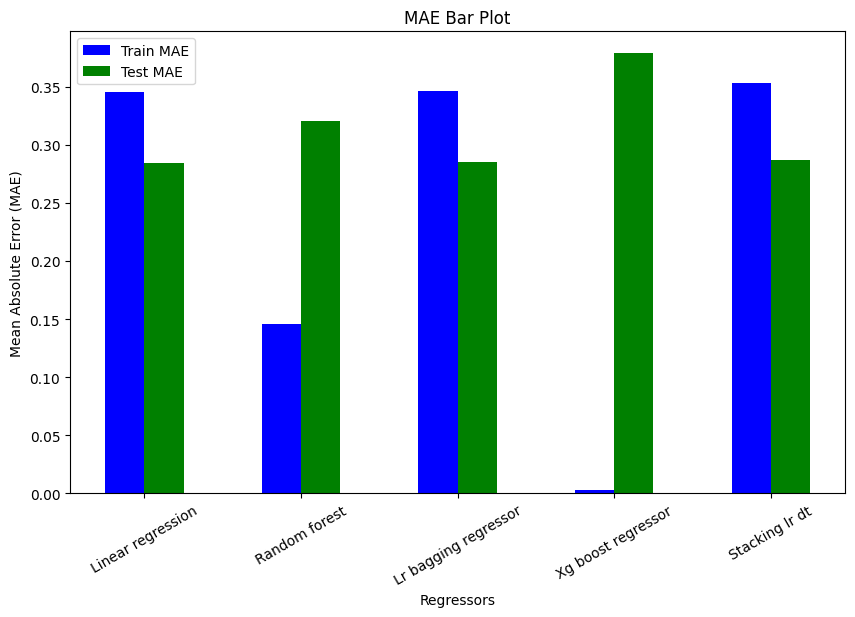

In [38]:
# Set model names
model_names = [model.replace("_", " ").capitalize() for model in models]

x = np.arange(len(model_names))  # Set bar's positions

# Create graph
width = 0.25 # width for each bar
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, mae_train, width, label='Train MAE', color='blue')
plt.bar(x + width/2, mae_test, width, label='Test MAE', color='green')

# Set Labels
plt.xlabel("Regressors")
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("MAE Bar Plot")
plt.xticks(x, model_names, rotation=30)
plt.legend()
plt.show()
